# 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot을 로드

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 학습, 예측 데이터셋 나누기

In [4]:
# 8:2의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count라는 변수에 담는다.
# training data와 test data로 나눌 때 614번째 인덱스를 기준으로 나눈다

split_count = int(df.shape[0]*0.8)
split_count

614

In [5]:
# train, test로 슬라이싱을 통해 데이터를 나누고 복사본을 만든다.
# index 0~613 = train data set

train = df[:split_count].copy()
train.shape

(614, 9)

In [6]:
# index 614~767 = test data set

test = df[split_count:].copy()
test.shape

(154, 9)

## 학습, 예측에 사용할 컬럼

In [7]:
# feature_names라는 변수에 학습과 예측에 사용할 컬럼명을 리스트로 가져온다.
# 가장 마지막 컬럼인 'Outcome'은 정답값으로 사용하기 위해 뺀다.

feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 정답값이자 예측해야 될 값

In [8]:
# label_name이라는 변수에 예측할 컬럼인 Outcome을 담는다. 
# 하나만 사용할 것이기 때문에 리스트가 아닌 String 형태로 가져온다

label_name = train.columns[-1]
label_name

'Outcome'

## 학습, 예측 데이터셋 만들기

In [9]:
# 학습세트 만들기 예) 시험의 기출문제
# 대문자 X는 행렬 형태

X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
# 정답값을 만들어 준다. 예) 기출문제의 정답
# 소문자 y는 벡터 형태

y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [11]:
# 예측에 사용할 데이터세트를 만든다. 예) 실전 시험 문제

X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [12]:
# 예측의 정답값 예) 실전 시험 문제의 정답

y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

# 머신러닝 알고리즘 가져오기

In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

## 학습(훈련)

- 시험을 볼 때 기출문제(X_train)과 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [14]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

## 예측
- 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [15]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

## 트리 알고리즘 분석하기

- DecisionTree를 시각화 합니다.

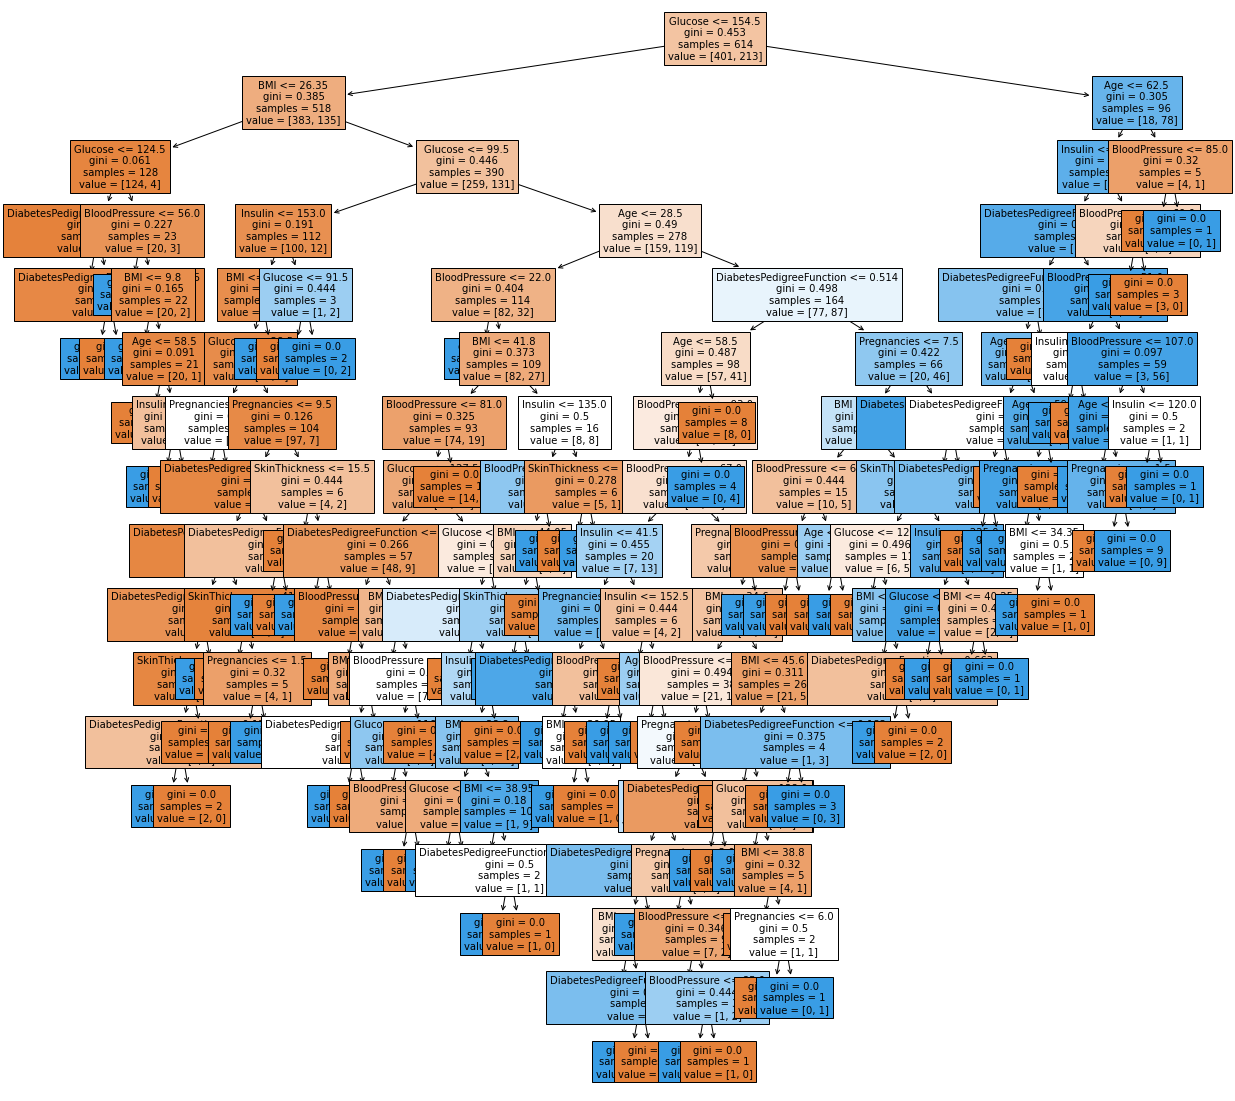

In [16]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

- Glucose가 가장 좋은 조건이라서 가장 위에 있음

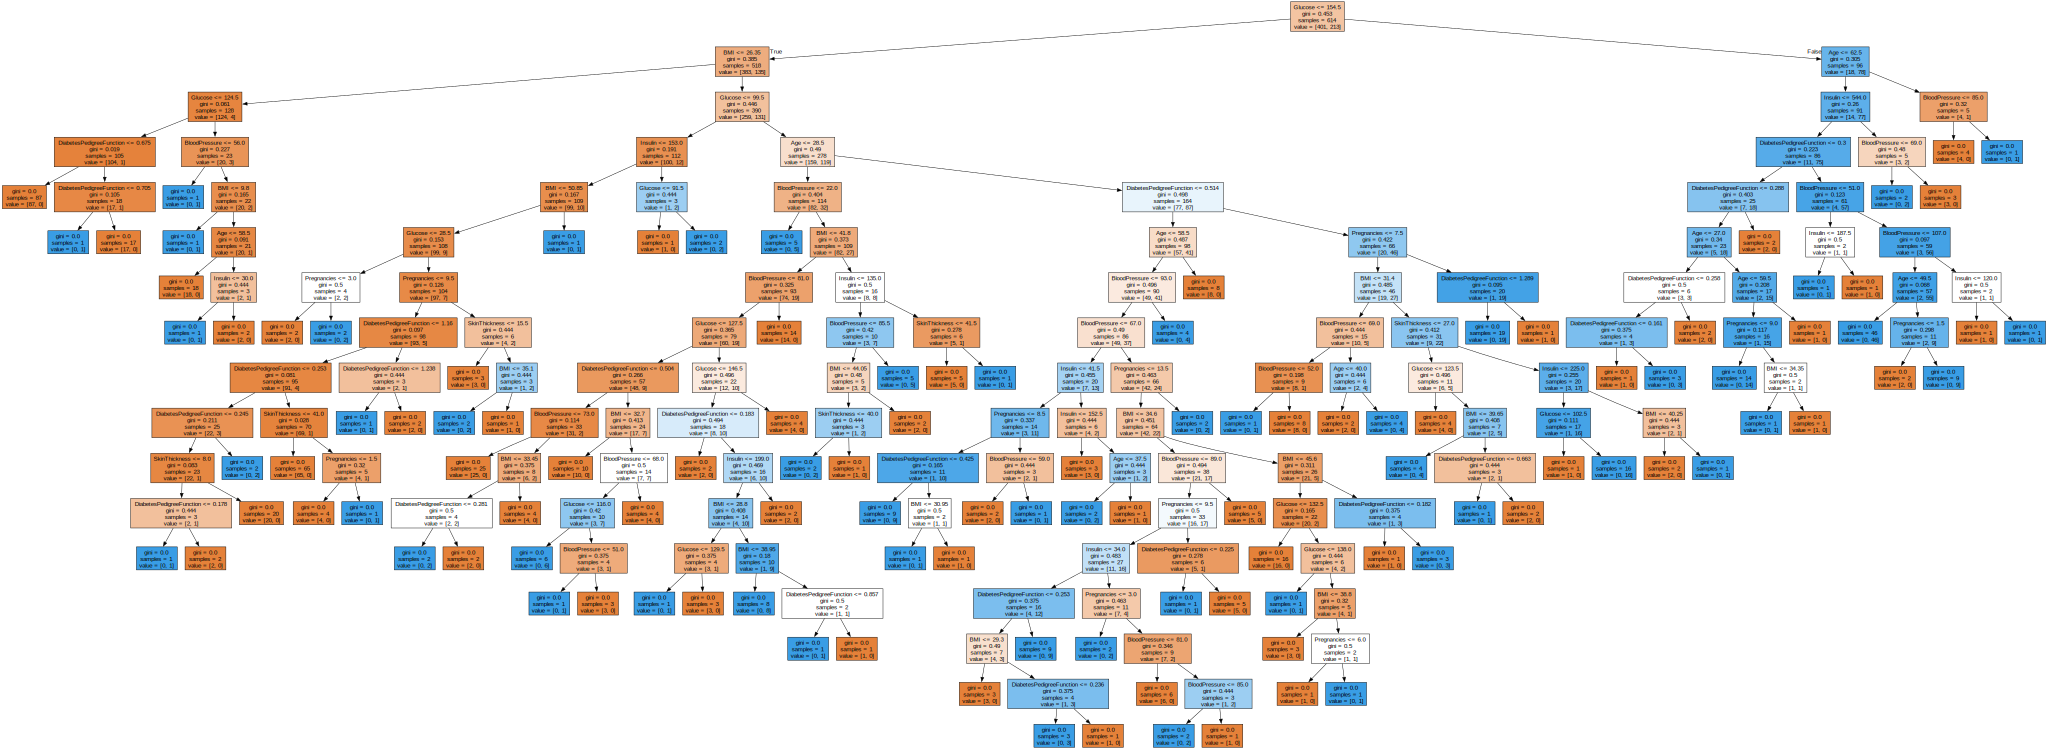

In [17]:
# graphviz를 통해 시각화 합니다.

import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names=feature_names, filled=True)
graphviz.Source(dot_tree)

In [18]:
# feature의 중요도를 추출하기

model.feature_importances_

array([0.07302744, 0.30420876, 0.13151351, 0.02697206, 0.06531407,
       0.1739702 , 0.14049678, 0.08449717])

<AxesSubplot:>

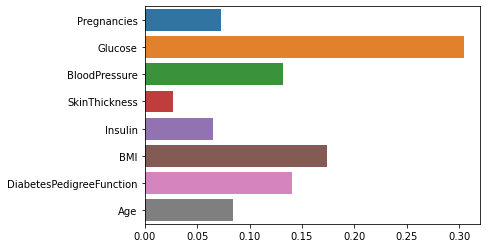

In [19]:
# feature의 중요도 시각화 하기

sns.barplot(x=model.feature_importances_, y=feature_names)

# Accuracy 측정하기

In [20]:
# (실제값-예측값) = 0이면 같게 예측한 것.
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 된다.

diff_count = abs(y_test - y_predict).sum()
diff_count

41

In [21]:
(len(y_test) - diff_count) / len(y_test) * 100

73.37662337662337

In [22]:
# 위에서처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용할 수도 있음

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

73.37662337662337

In [23]:
# model의 score로도 점수를 계산할 수 있음.

model.score(X_test, y_test) * 100

73.37662337662337